In [1]:
# Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Data collection and analysis

In [4]:
# Loading the data from csv file to a pandas dataframe
insurance_datset = pd.read_csv('insurance.csv')

In [5]:
insurance_datset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# NUmber of rows and columns
insurance_datset.shape

(1338, 7)

In [7]:
insurance_datset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
'''
Categorical features:
-> Sex
-> Smoker
-> Region
'''

'\nCategorical features:\n-> Sex\n-> Smoker\n-> Region\n'

In [9]:
# checking for missing values
insurance_datset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Data Analysis

In [11]:
# Statistical measures of the dataset
insurance_datset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18780\3379664718.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_datset['age'])


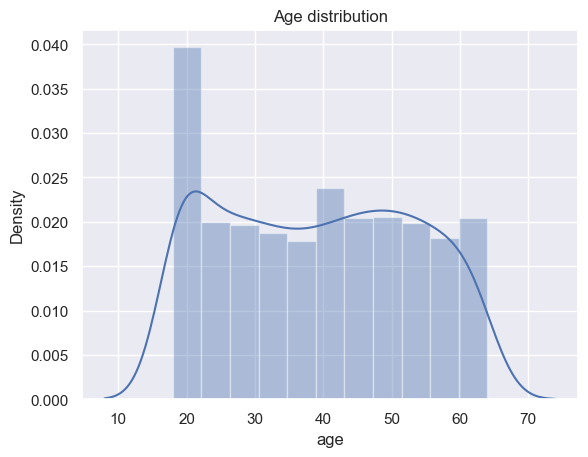

In [12]:
# Distribution of age value
sns.set()
plt.Figure(figsize=(6,6))
sns.distplot(insurance_datset['age'])
plt.title('Age distribution')
plt.show()

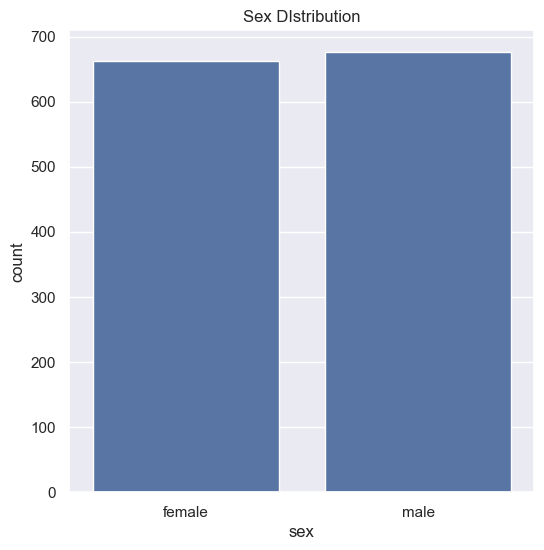

In [13]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_datset)
plt.title('Sex DIstribution')
plt.show()

In [14]:
insurance_datset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18780\2008670952.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_datset['bmi'])


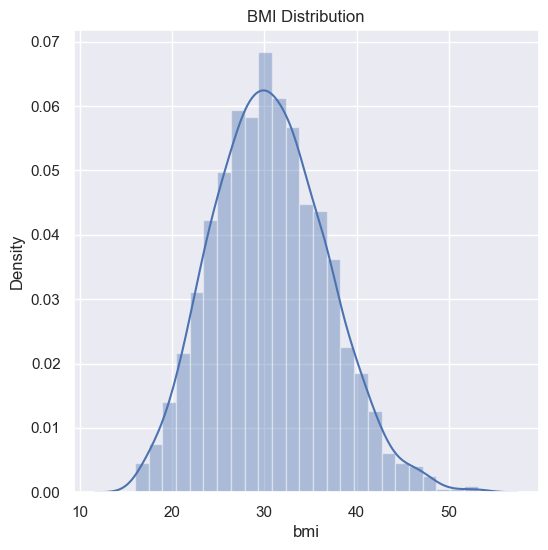

In [15]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_datset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [16]:
# normal bmi range --> [18.5 - 24.9]

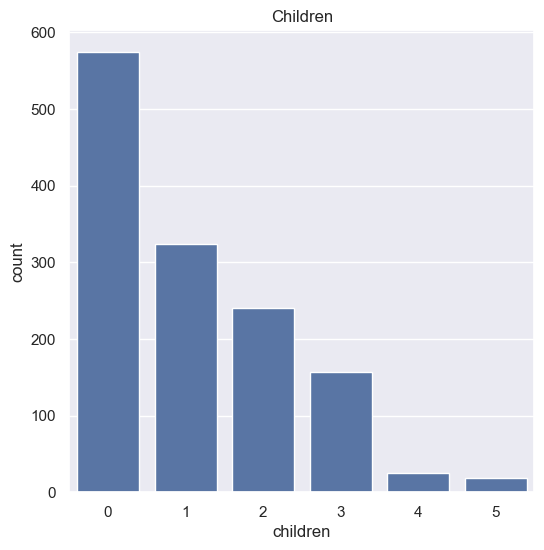

In [17]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_datset)
plt.title('Children')
plt.show()

In [18]:
insurance_datset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

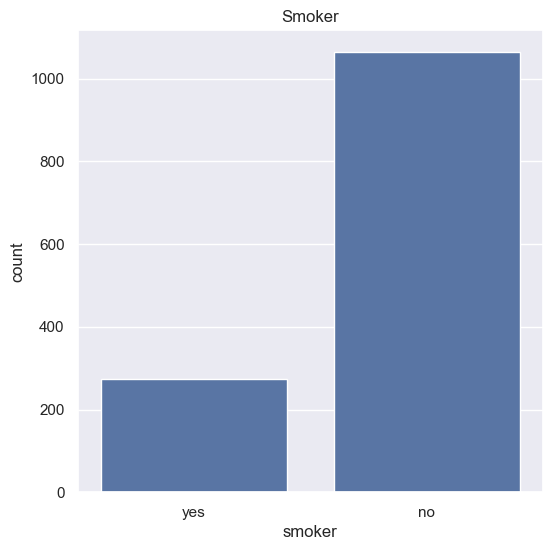

In [19]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_datset)
plt.title('Smoker')
plt.show()

In [20]:
insurance_datset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

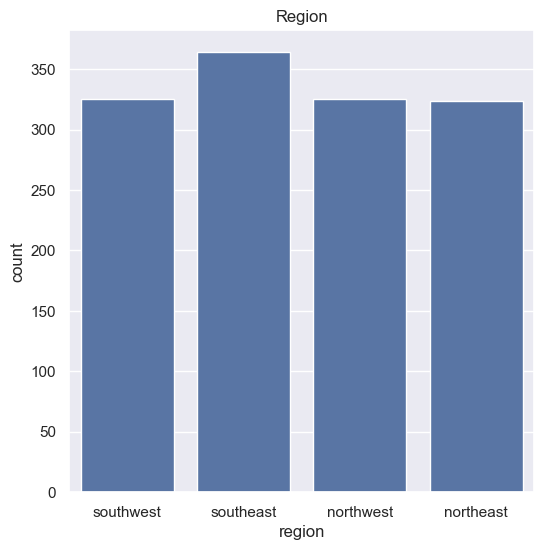

In [21]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_datset)
plt.title('Region')
plt.show()

In [22]:
insurance_datset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18780\3746330010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_datset['charges'])


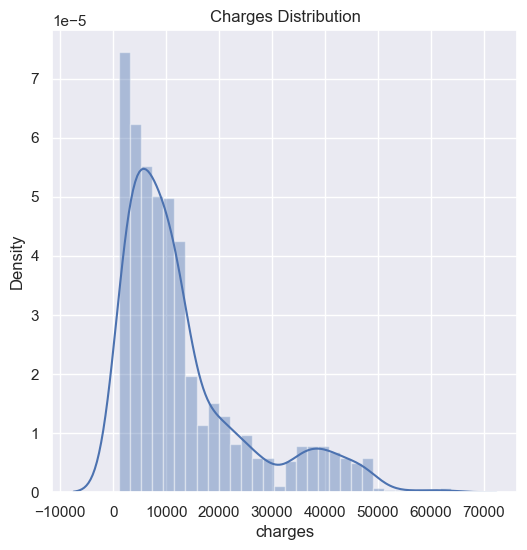

In [23]:
# charges distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_datset['charges'])
plt.title('Charges Distribution')
plt.show()

In [24]:
insurance_datset['charges'].value_counts()

charges
1639.56310     2
6203.90175     1
12981.34570    1
28101.33305    1
28923.13692    1
              ..
1163.46270     1
19496.71917    1
7201.70085     1
5425.02335     1
16115.30450    1
Name: count, Length: 1337, dtype: int64

In [25]:
# Encoding the categorical features

In [26]:
# encoding sex column
insurance_datset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
insurance_datset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
insurance_datset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)              

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18780\2973813288.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_datset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18780\2973813288.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_datset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_18780\2973813288.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future

In [27]:
insurance_datset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [28]:
X = insurance_datset.drop(columns='charges', axis=1)
y = insurance_datset['charges']

In [29]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [30]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [31]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [33]:
# Model training
# Linear regression

In [34]:
# Loading the linear regression model
regressor = LinearRegression()

In [35]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# Model Evaluation

In [37]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [38]:
# R2 value
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [39]:
r2_train

0.751505643411174

In [40]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)


In [41]:
# R2 value
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [42]:
r2_test

0.7447273869684077

In [43]:
# Building a predictive system

In [44]:
input_data = (31, 1, 25.74, 0, 1, 0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

c:\Users\KIIT0001\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
print(prediction[0])

3760.0805764960496
